# Understanding Data - Exploratory Data Analysis




# **Objective**

The aim of this Exploratory Data Analysis (EDA) assignment is to emphasize its critical role in data science by providing both theoretical knowledge and practical skills. EDA is the backbone of any data analysis, offering insights through statistical summaries and visualizations. This assignment will explore theoretical concepts like distribution analysis and correlation studies, and apply them to a real-world dataset. The custom problem statement involves a Python-based solution where students will use libraries like Pandas, Matplotlib, and Seaborn to analyze a dataset, uncover patterns, detect anomalies, and draw meaningful conclusions. This hands-on approach will bridge the gap between theory and practical application in data science.



# **Research Question**

A pertinent research question for this EDA assignment:

 **"How can Exploratory Data Analysis enhance our understanding of a dataset's characteristics and relationships, leading to more informed decision-making and predictive modeling?"**

 This question invites an investigation into how EDA techniques can reveal hidden patterns, trends, and connections within a dataset, ultimately aiding in more effective data-driven strategies and model development.

# **Why is it interesting?**

1. **Discovery of Patterns:** EDA is the detective work of data science. It allows analysts to uncover hidden patterns and relationships in the data that are not immediately obvious. This exploration can lead to valuable insights and new hypotheses.
2. **Data Quality Assessment:** It helps in identifying data quality issues such as missing values, outliers, or inconsistent data. Addressing these issues early on is crucial for the accuracy of any further analysis.
3. **Guiding Advanced Analysis:** The insights gained from EDA guide more complex analyses. By understanding the data's structure and relationships, data scientists can choose appropriate models and techniques for further investigation.
4. **Facilitating Communication:** EDA's visual nature makes it easier to communicate findings and tell stories with data. Visualizations like graphs and charts are powerful tools for conveying complex information in an understandable way.



# **Step 1: Theoretical Foundations**

**Basics of Algorithms and Problem Design:**

1. Algorithms are step-by-step procedures for calculations, data processing, and automated reasoning. In EDA, algorithms play a role in data sorting, classification, and visualization.
2. Problem design involves framing a question or challenge that the analysis aims to address. In EDA, this could mean defining specific goals like identifying trends, patterns, or anomalies in a dataset.
**Relevance of Custom Problem Creation:**
1. Custom problem creation in EDA is crucial for teaching and assessing data science skills. It encourages critical thinking and application of theoretical knowledge to real-world scenarios.
2. It also helps in understanding the practical challenges and limitations one might face in real data science projects, such as dealing with messy or incomplete data.
**Leveraging Tools like ChatGPT:**
1. Tools like ChatGPT can assist in brainstorming EDA problems, suggesting potential datasets, and providing guidance on analytical approaches.
2. ChatGPT can also offer instant feedback and explanations, making the learning process interactive and adaptive to individual needs.

# Step 2: Introduction to the Worked Example Problem


**Overview:**
1. Begin with a detailed introduction to the problem of customer churn in the banking sector. Emphasize the economic impact of churn and its relevance in today's competitive banking landscape.
2. Discuss how data science techniques can be leveraged to predict churn, which is crucial for retaining valuable customers and optimizing marketing strategies.
**Context:**
1. Elaborate on how churn prediction is integral in understanding customer behavior, improving customer satisfaction, and enhancing personalized banking services. Mention the increasing reliance on big data analytics in the banking sector for strategic decision-making.
**Underlying Principles:**
1. Delve into key data science methodologies employed in this problem, such as exploratory data analysis for uncovering trends and patterns in customer behavior, machine learning for predictive modeling, and the importance of data preprocessing and feature engineering.

# Step 3: Worked Example Problem



1.   Present a detailed problem statement focused on predicting bank customer churn based on various customer attributes like demographics, account details, transaction history, etc.

1.   Explain the input-output format: Inputs could be customer attributes, and the output would be a binary classification (churn or no churn).
2.   Include sample inputs and expected outputs to give a clear idea of the data structure and desired predictions.












<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

%pip install scikit-plot

import scikitplot as skplt

plt.rc('figure',figsize=(18,9))
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

<a id="1.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>


In [2]:
c_data = pd.read_csv('BankChurners.csv')
c_data = c_data[c_data.columns[:-2]]
c_data.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  

[3 rows x 21 columns]

<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


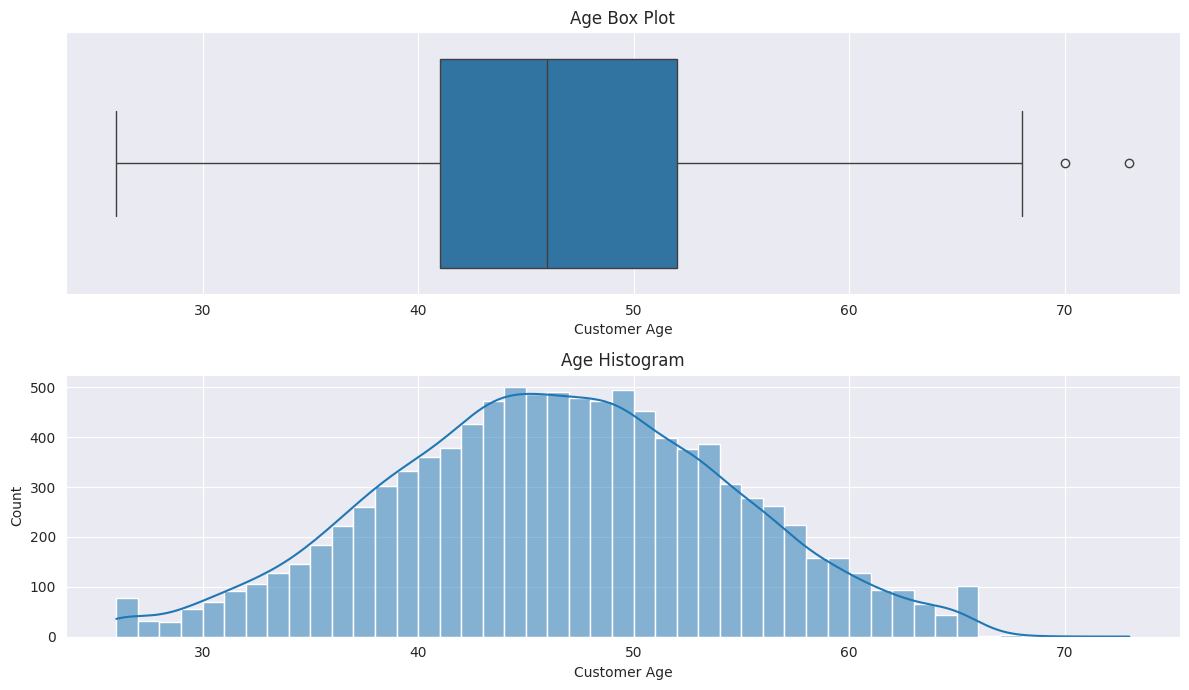

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Customer Age
sns.boxplot(x=c_data['Customer_Age'], ax=axes[0])
axes[0].set_title('Age Box Plot')
axes[0].set_xlabel('Customer Age')

# Histogram for Customer Age
sns.histplot(c_data['Customer_Age'], kde=True, ax=axes[1])
axes[1].set_title('Age Histogram')
axes[1].set_xlabel('Customer Age')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.</span></p>

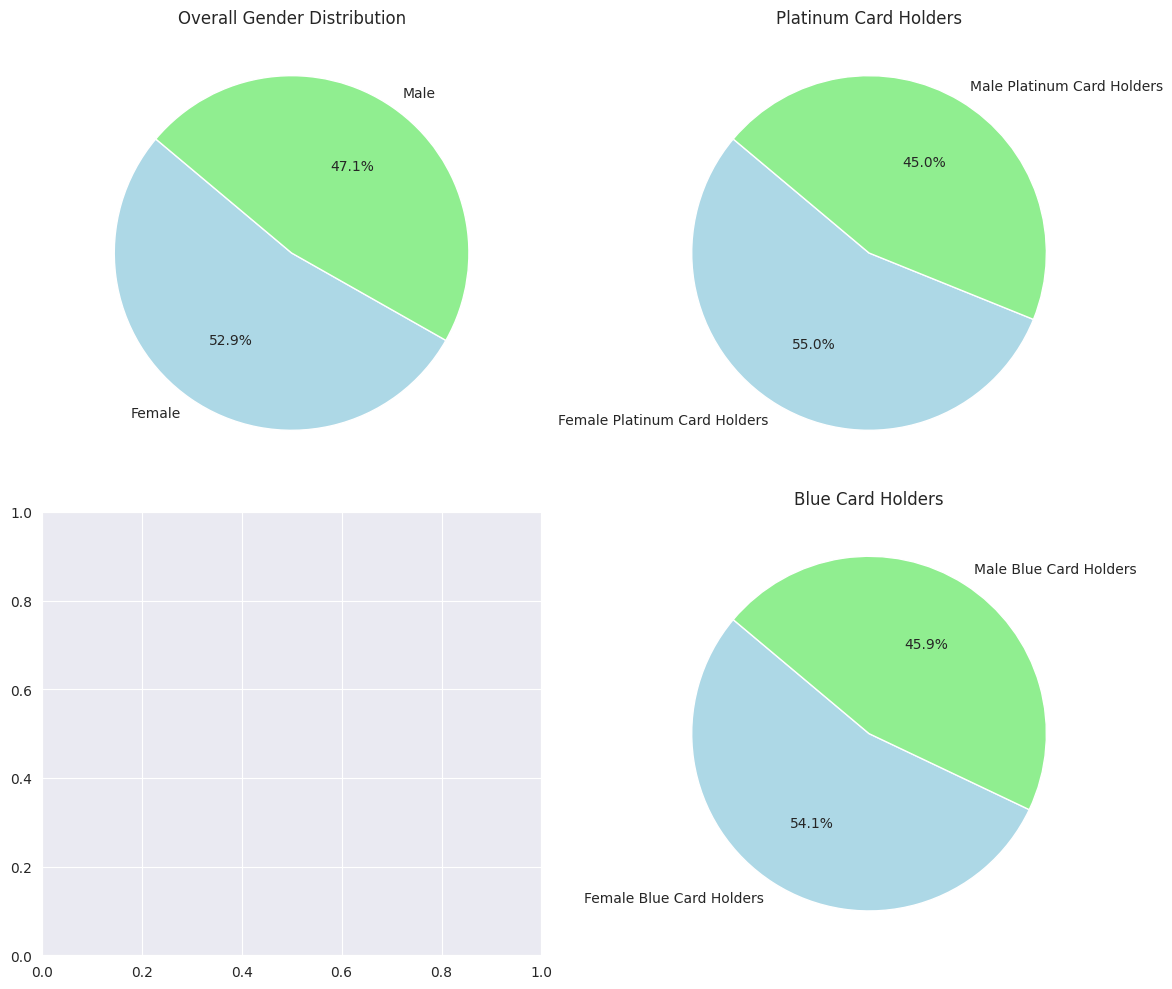

In [4]:
import matplotlib.pyplot as plt

# Define the data for the plots
gender_counts = c_data.Gender.value_counts()
platinum_counts = c_data.query('Card_Category == "Platinum"').Gender.value_counts()
blue_counts = c_data.query('Card_Category == "Blue"').Gender.value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Overall Gender Distribution
axes[0, 0].pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
axes[0, 0].set_title('Overall Gender Distribution')

# Platinum Card Holders
axes[0, 1].pie(platinum_counts, labels=['Female Platinum Card Holders', 'Male Platinum Card Holders'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
axes[0, 1].set_title('Platinum Card Holders')

# Blue Card Holders
axes[1, 1].pie(blue_counts, labels=['Female Blue Card Holders', 'Male Blue Card Holders'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
axes[1, 1].set_title('Blue Card Holders')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>More samples of females in our dataset are compared to males, but the percentage of difference is not that significant, so we can say that genders are uniformly distributed.</span></p>

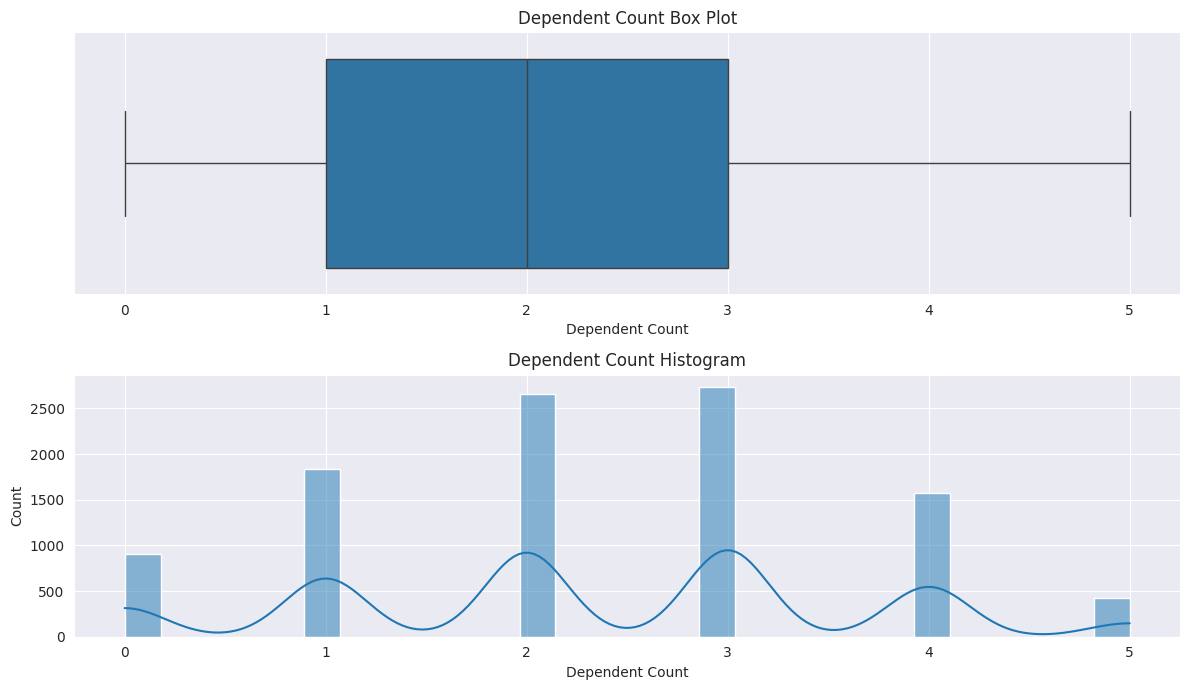

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Dependent Count
sns.boxplot(x=c_data['Dependent_count'], ax=axes[0])
axes[0].set_title('Dependent Count Box Plot')
axes[0].set_xlabel('Dependent Count')

# Histogram for Dependent Count
sns.histplot(c_data['Dependent_count'], kde=True, ax=axes[1])
axes[1].set_title('Dependent Count Histogram')
axes[1].set_xlabel('Dependent Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>The distribution of Dependent counts is fairly normally distributed with a slight right skew.</span></p>

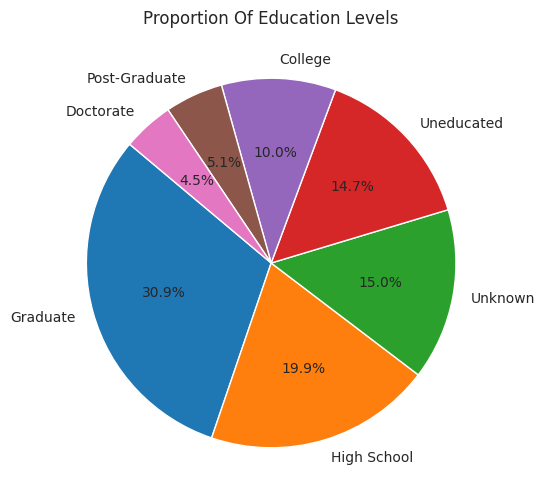

In [11]:
import matplotlib.pyplot as plt

# Calculate the counts of each education level
education_counts = c_data['Education_Level'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion Of Education Levels')
plt.show()



<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>If most of the customers with unknown education status lack any education, we can state that more than 70% of the customers have a formal education level. About 35% have a higher level of education.</span></p>

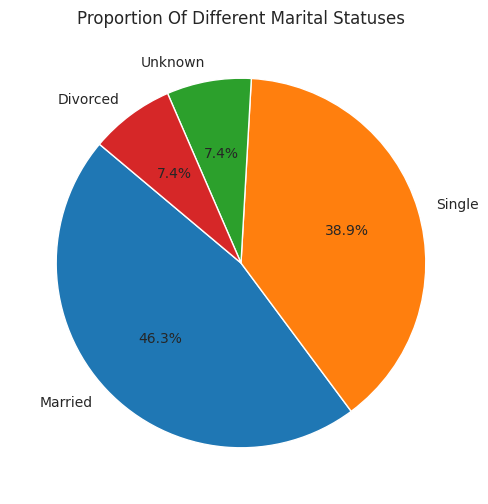

In [12]:
import matplotlib.pyplot as plt

# Calculate the counts of each marital status
marital_status_counts = c_data['Marital_Status'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion Of Different Marital Statuses')
plt.show()



<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>Almost half of the bank customers are married, and interestingly enough, almost the entire other half are single customers. only about 7% of the customers are divorced, which is surprising considering the worldwide divorce rate statistics! (let me know where the bank is located and sign me up!)</span></p>

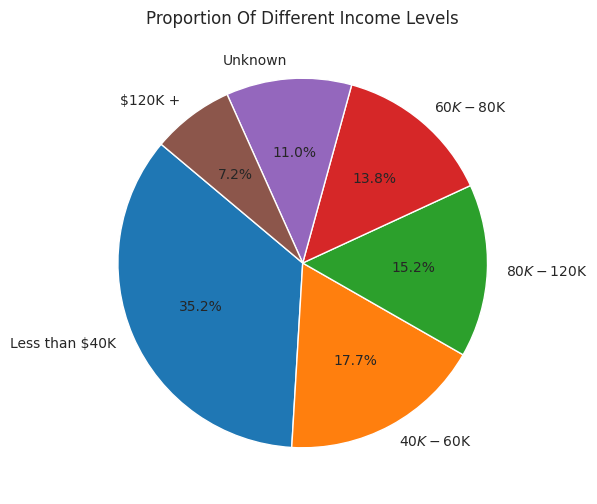

In [13]:
import matplotlib.pyplot as plt

# Calculate the counts of each income category
income_category_counts = c_data['Income_Category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_category_counts, labels=income_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion Of Different Income Levels')
plt.show()


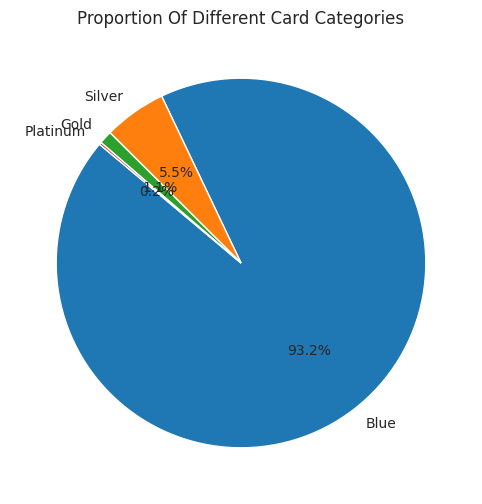

In [14]:
import matplotlib.pyplot as plt

# Calculate the counts of each card category
card_category_counts = c_data['Card_Category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(card_category_counts, labels=card_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion Of Different Card Categories')
plt.show()


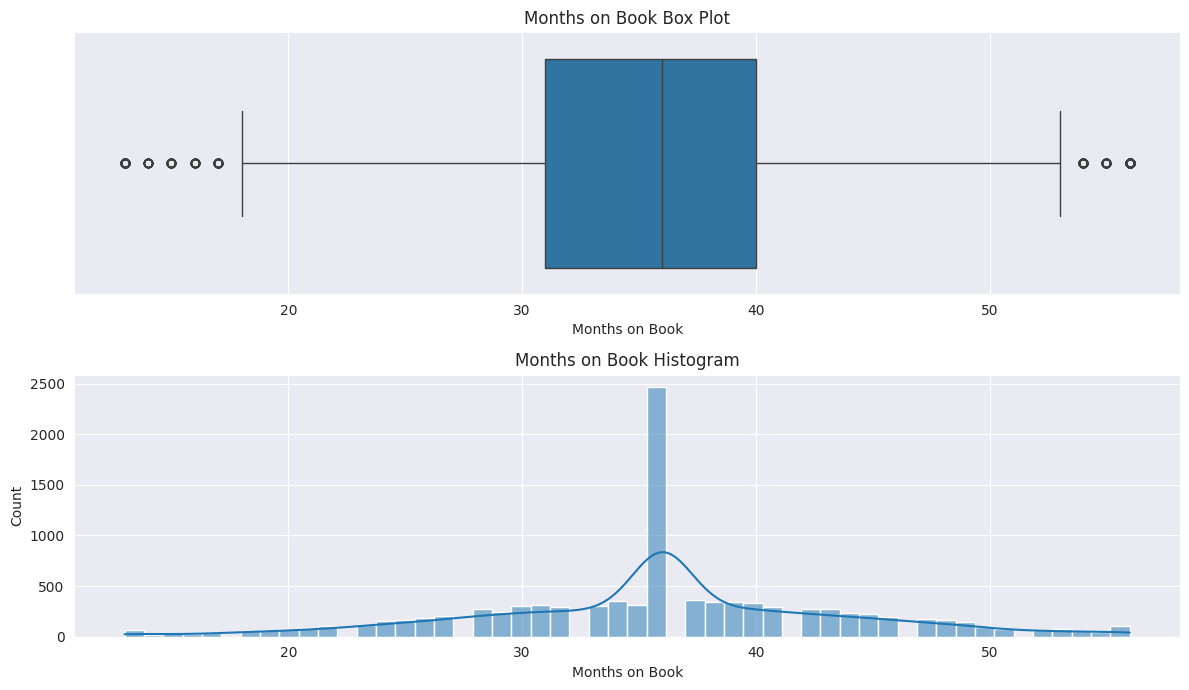

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Months on Book
sns.boxplot(x=c_data['Months_on_book'], ax=axes[0])
axes[0].set_title('Months on Book Box Plot')
axes[0].set_xlabel('Months on Book')

# Histogram for Months on Book
sns.histplot(c_data['Months_on_book'], kde=True, ax=axes[1])
axes[1].set_title('Months on Book Histogram')
axes[1].set_xlabel('Months on Book')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
print('Kurtosis of Months on book features is : {}'.format(c_data['Months_on_book'].kurt()))

Kurtosis of Months on book features is : 0.40010012019986707


<p style="text-align: center;"><span style='font-size: 24px; font-family: "Times New Roman", Times, serif;'>We have a low kurtosis value pointing to a very flat shaped distribution (as shown in the plots above as well), meaning we cannot assume normality of the feature.</span></p>

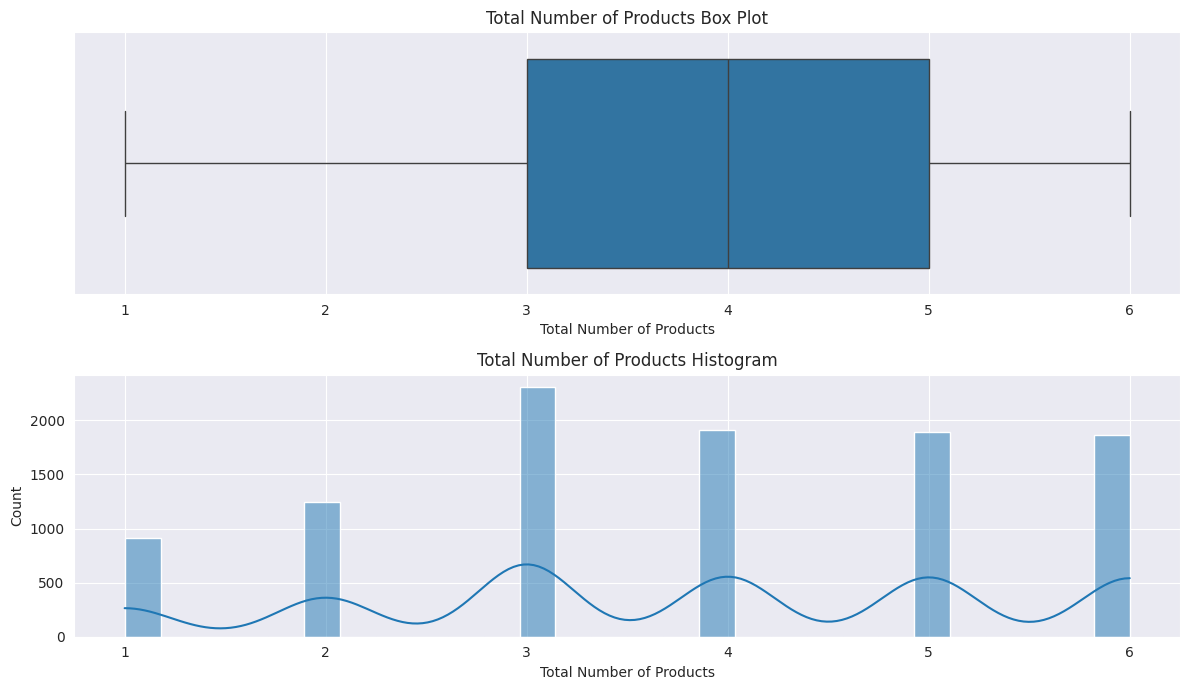

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Total Number of Products
sns.boxplot(x=c_data['Total_Relationship_Count'], ax=axes[0])
axes[0].set_title('Total Number of Products Box Plot')
axes[0].set_xlabel('Total Number of Products')

# Histogram for Total Number of Products
sns.histplot(c_data['Total_Relationship_Count'], kde=True, ax=axes[1])
axes[1].set_title('Total Number of Products Histogram')
axes[1].set_xlabel('Total Number of Products')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>The distribution of the total number of products held by the customer seems closer to a uniform distribution and may appear useless as a predictor for churn status.</span></p>

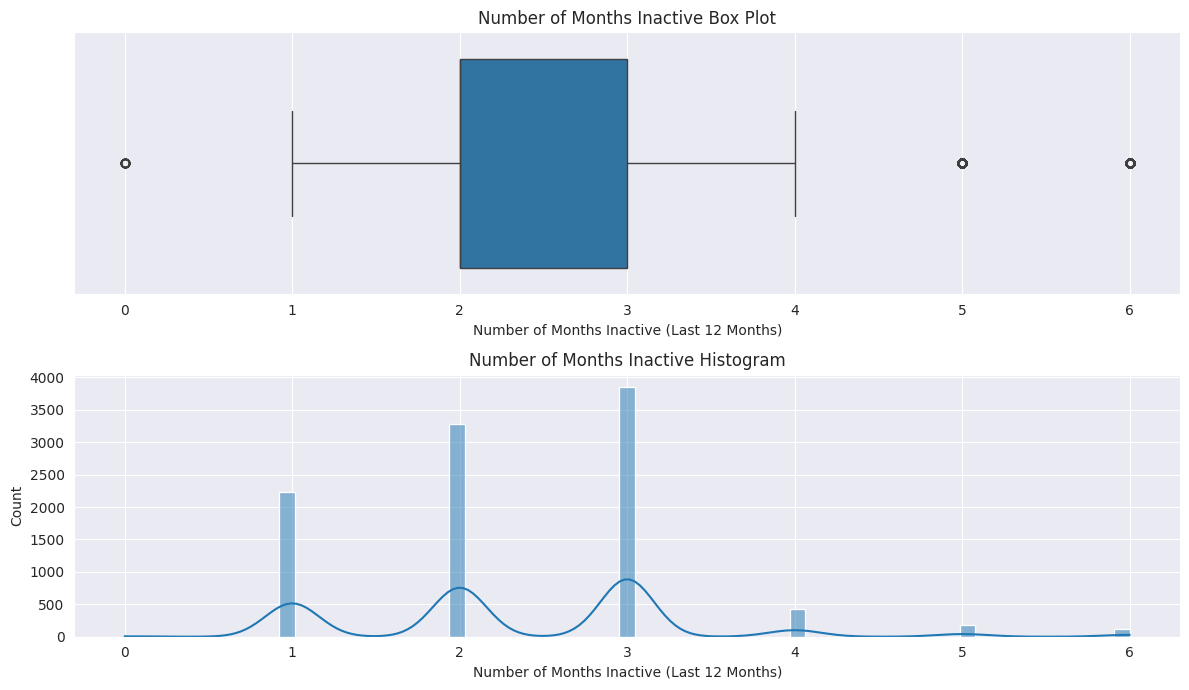

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Number of Months Inactive
sns.boxplot(x=c_data['Months_Inactive_12_mon'], ax=axes[0])
axes[0].set_title('Number of Months Inactive Box Plot')
axes[0].set_xlabel('Number of Months Inactive (Last 12 Months)')

# Histogram for Number of Months Inactive
sns.histplot(c_data['Months_Inactive_12_mon'], kde=True, ax=axes[1])
axes[1].set_title('Number of Months Inactive Histogram')
axes[1].set_xlabel('Number of Months Inactive (Last 12 Months)')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


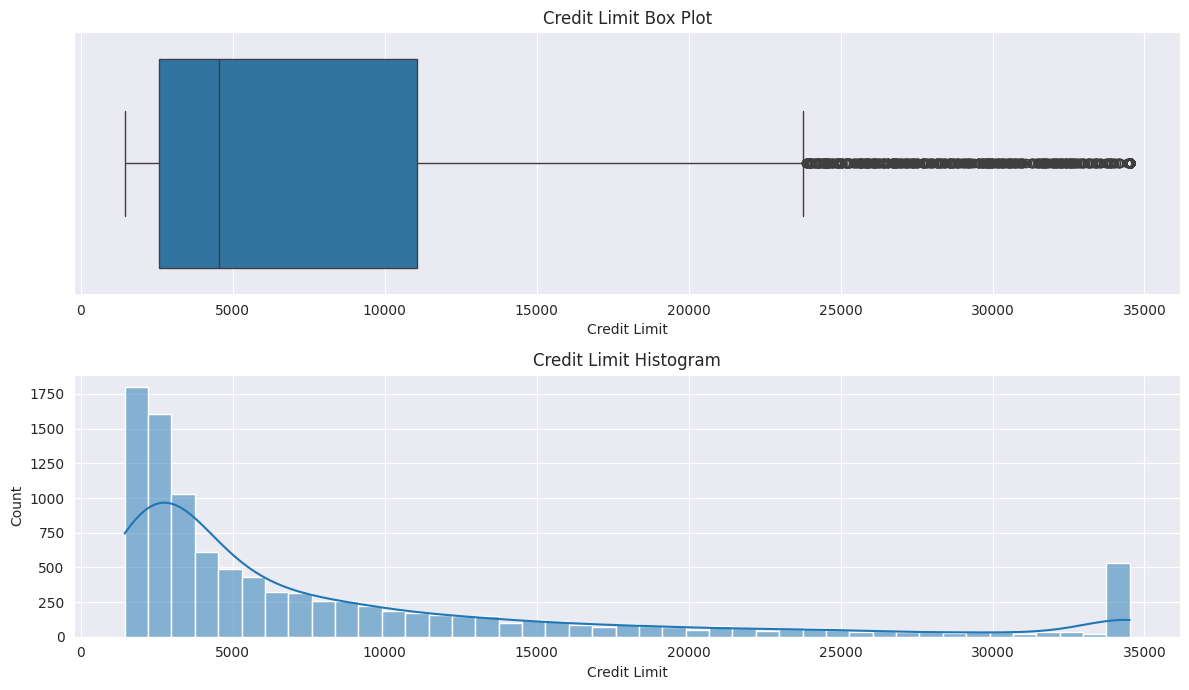

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Credit Limit
sns.boxplot(x=c_data['Credit_Limit'], ax=axes[0])
axes[0].set_title('Credit Limit Box Plot')
axes[0].set_xlabel('Credit Limit')

# Histogram for Credit Limit
sns.histplot(c_data['Credit_Limit'], kde=True, ax=axes[1])
axes[1].set_title('Credit Limit Histogram')
axes[1].set_xlabel('Credit Limit')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


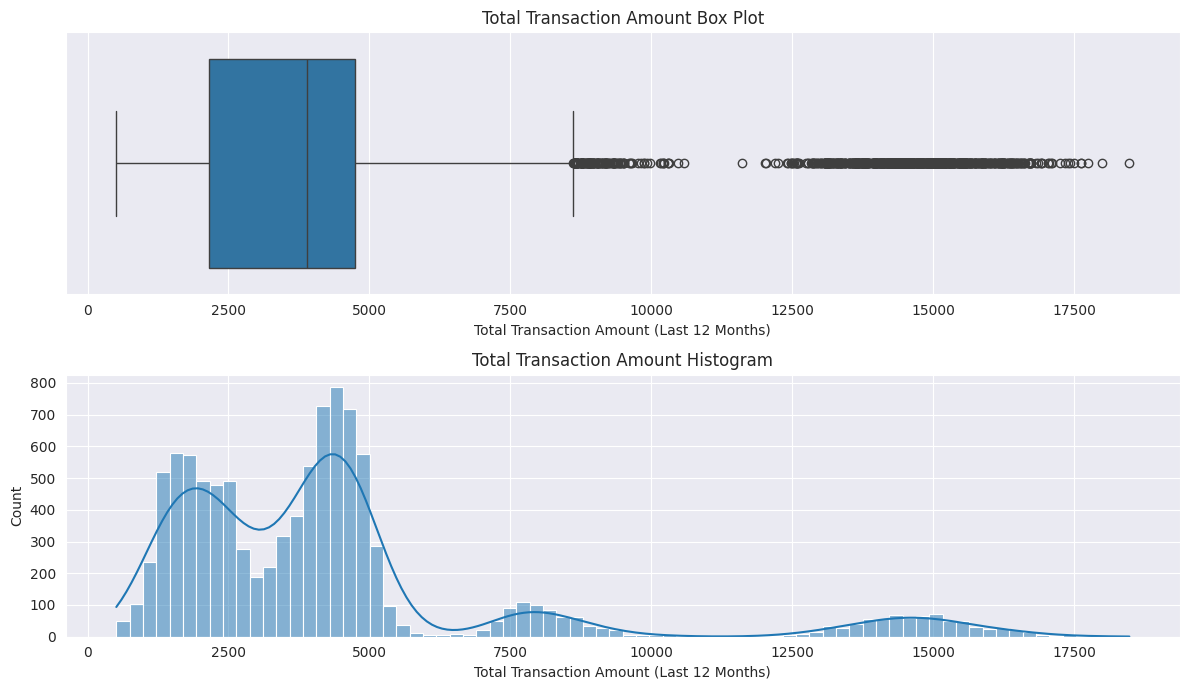

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('darkgrid')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

# Boxplot for Total Transaction Amount
sns.boxplot(x=c_data['Total_Trans_Amt'], ax=axes[0])
axes[0].set_title('Total Transaction Amount Box Plot')
axes[0].set_xlabel('Total Transaction Amount (Last 12 Months)')

# Histogram for Total Transaction Amount
sns.histplot(c_data['Total_Trans_Amt'], kde=True, ax=axes[1])
axes[1].set_title('Total Transaction Amount Histogram')
axes[1].set_xlabel('Total Transaction Amount (Last 12 Months)')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.</span></p>

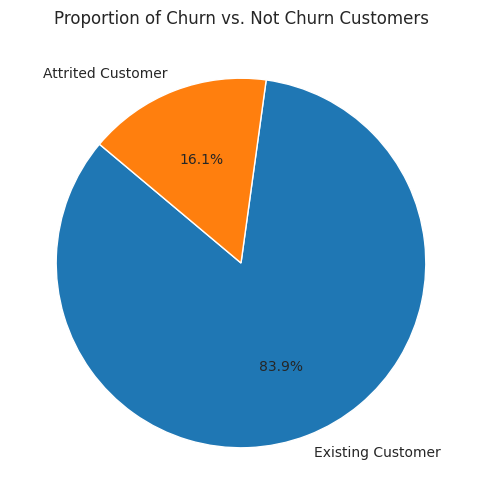

In [22]:
import matplotlib.pyplot as plt

# Calculate the counts of churn and not churn customers
churn_counts = c_data['Attrition_Flag'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Churn vs. Not Churn Customers')
plt.show()


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>As we can see, only 16% of the data samples represent churn customers; in the following steps, I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.</span></p>

In [23]:
c_data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h1>


In [24]:
c_data.Attrition_Flag = c_data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
c_data.Gender = c_data.Gender.replace({'F':1,'M':0})
c_data = pd.concat([c_data,pd.get_dummies(c_data['Education_Level']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Income_Category']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Card_Category']).drop(columns=['Platinum'])],axis=1)
c_data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>Here we one hot encode all the categorical features describing different statuses of a customer.</span></p>

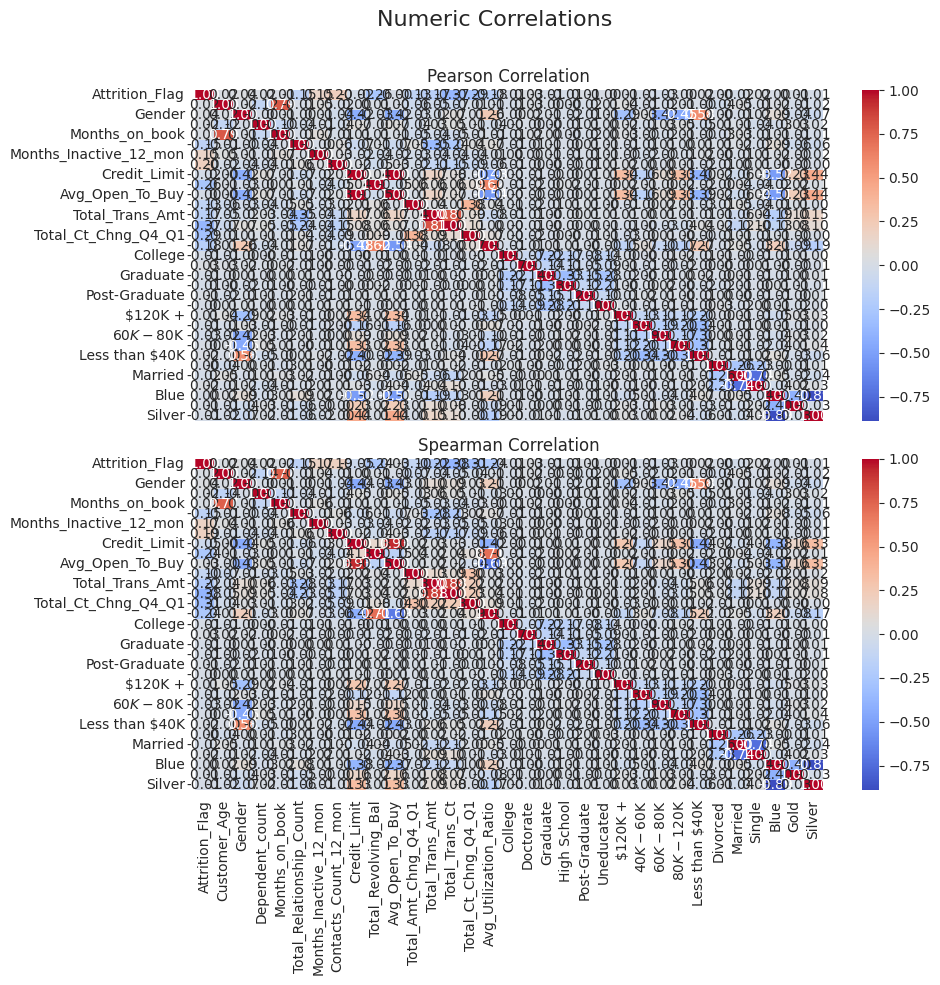

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation
pearson_corr = c_data.corr('pearson')

# Calculate Spearman correlation
spearman_corr = c_data.corr('spearman')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
fig.suptitle('Numeric Correlations', fontsize=16)

# Pearson Correlation Heatmap
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0], cbar=True)
axes[0].set_title('Pearson Correlation')

# Spearman Correlation Heatmap
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1], cbar=True)
axes[1].set_title('Spearman Correlation')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Upsampling Using SMOTE</h3>


In [28]:
oversample = SMOTE()
X, y = oversample.fit_resample(c_data[c_data.columns[1:]], c_data[c_data.columns[0]])
usampled_df = X.assign(Churn = y)

In [29]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

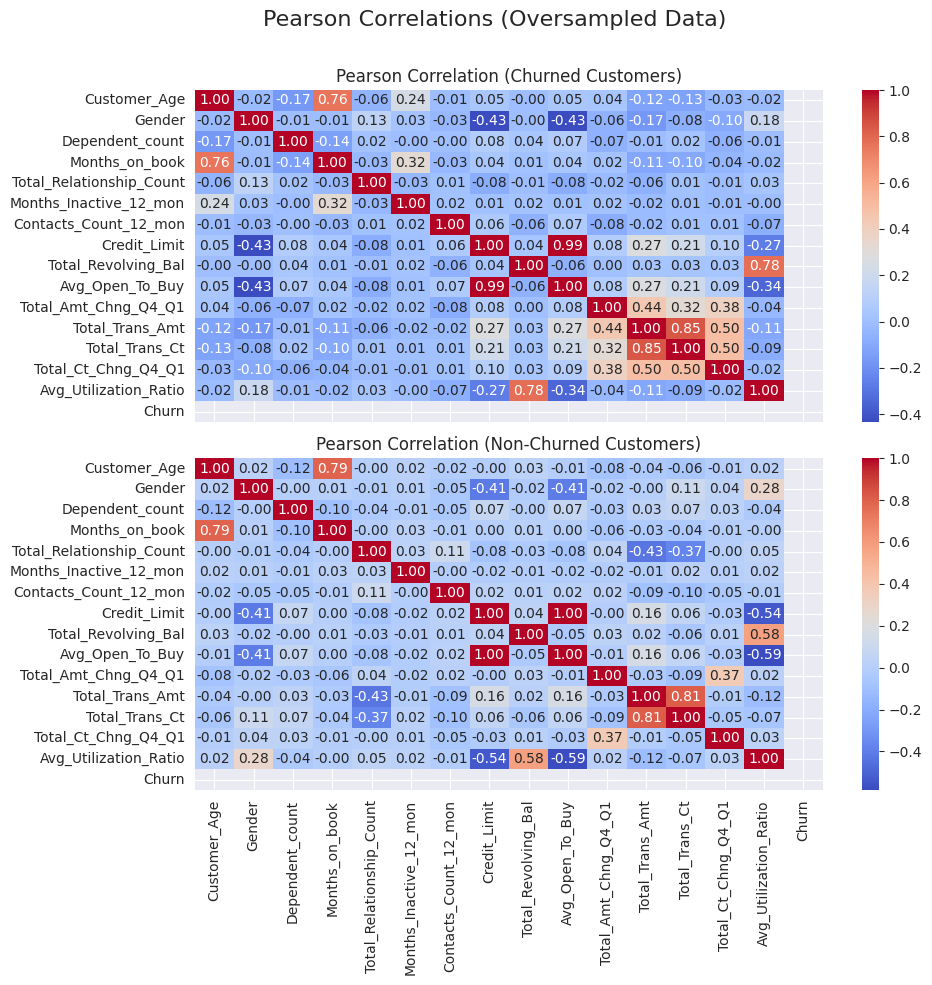

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation for churned customers
churned_corr = usampled_df[usampled_df['Churn'] == 1].corr('pearson')

# Calculate Pearson correlation for non-churned customers
not_churned_corr = usampled_df[usampled_df['Churn'] == 0].corr('pearson')

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
fig.suptitle('Pearson Correlations (Oversampled Data)', fontsize=16)

# Churned Customers Correlation Heatmap
sns.heatmap(churned_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0], cbar=True)
axes[0].set_title('Pearson Correlation (Churned Customers)')

# Non-Churned Customers Correlation Heatmap
sns.heatmap(not_churned_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1], cbar=True)
axes[1].set_title('Pearson Correlation (Non-Churned Customers)')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Principal Component Analysis Of One Hot Encoded Data </h3>


<p style="text-align: center;"><span style='font-family: "Times New Roman", Times, serif; font-size: 24px;'>We will use principal component analysis to reduce the dimensionality of the one-hot encoded categorical variables losing some of the variances, but simultaneously, using a couple of principal components instead of tens of one-hot encoded features will help me construct a better model.</span></p>

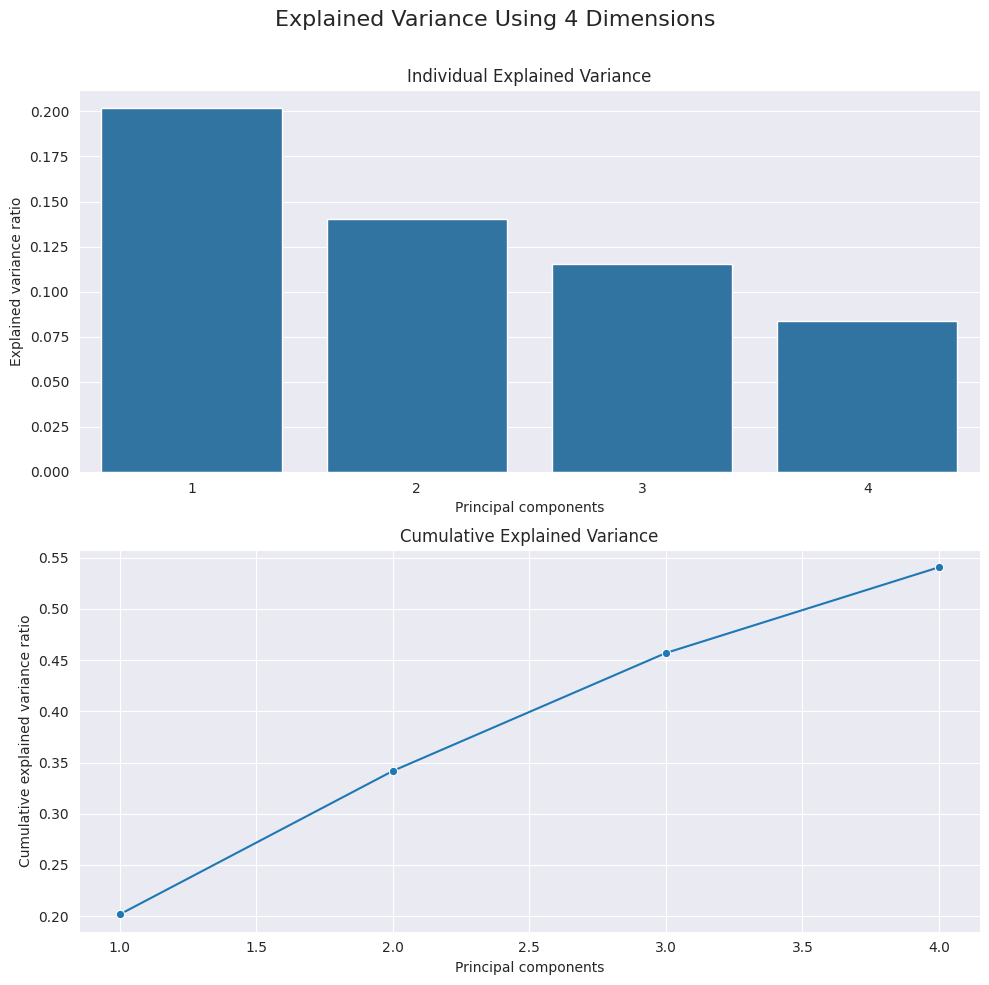

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the explained variance ratio
evr = pca_model.explained_variance_ratio_

# Calculate the cumulative explained variance
cumsum_evr = np.cumsum(evr)

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig.suptitle('Explained Variance Using {} Dimensions'.format(N_COMPONENTS), fontsize=16)

# Individual Explained Variance
sns.barplot(x=range(1, N_COMPONENTS + 1), y=evr, ax=axes[0])
axes[0].set_title('Individual Explained Variance')
axes[0].set_xlabel('Principal components')
axes[0].set_ylabel('Explained variance ratio')

# Cumulative Explained Variance
sns.lineplot(x=range(1, N_COMPONENTS + 1), y=cumsum_evr, marker='o', ax=axes[1])
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Principal components')
axes[1].set_ylabel('Cumulative explained variance ratio')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


<a id="4"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Model Selection And Evaluation</h1>


In [41]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [42]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

<a id="4.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Cross Validation</h3>


In [43]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')

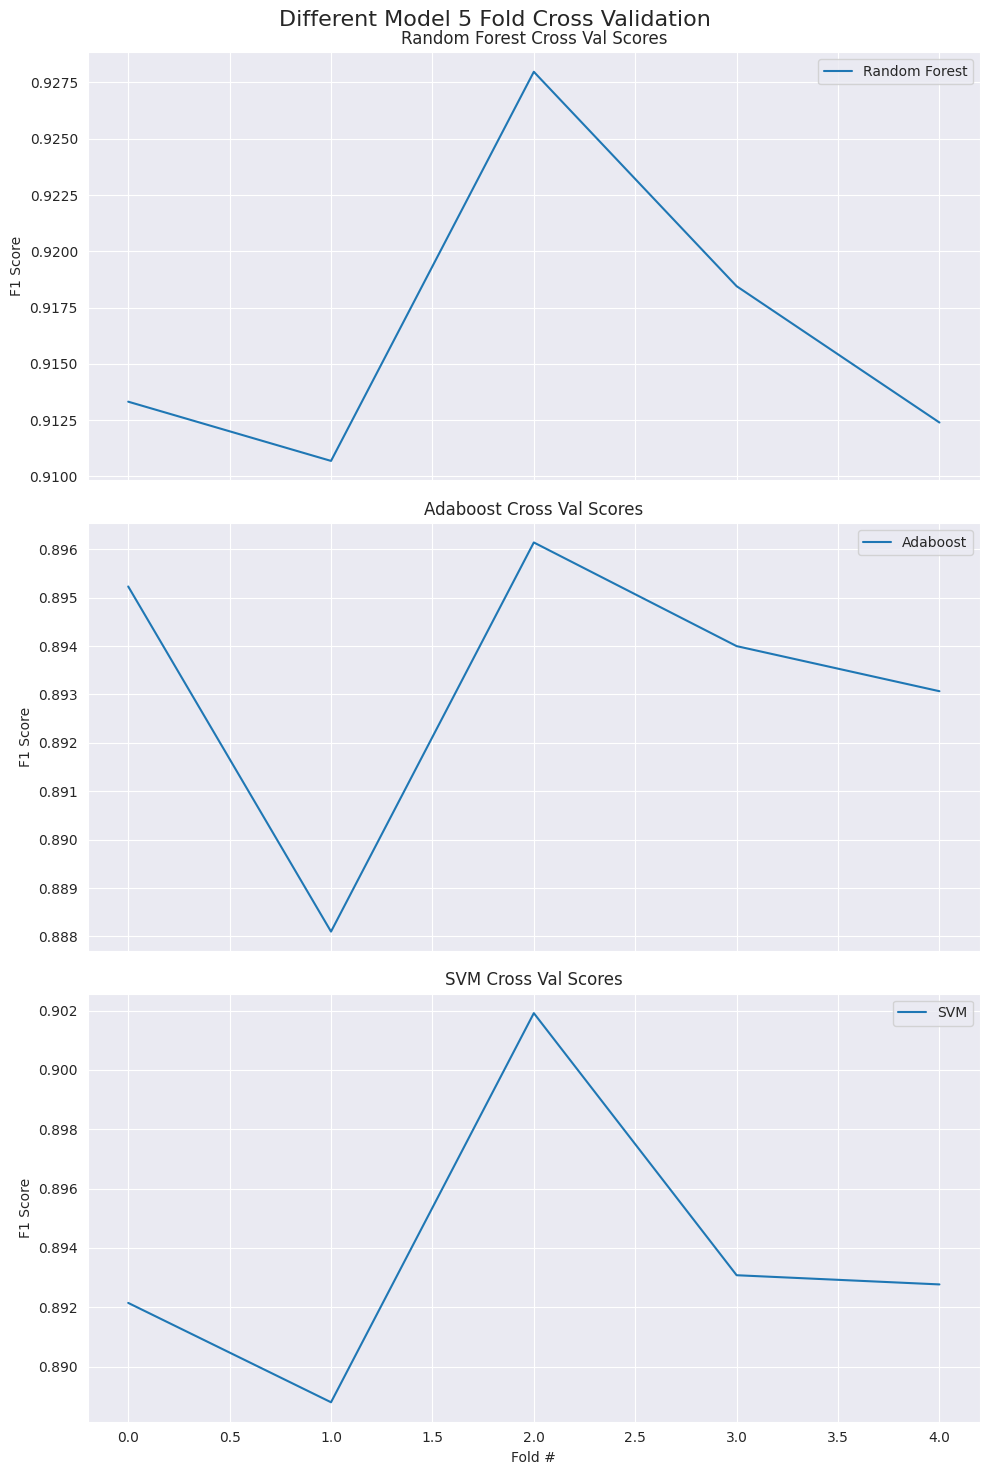

In [45]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot Random Forest Cross Val Scores
ax[0].plot(range(len(f1_cross_val_scores)), f1_cross_val_scores, label='Random Forest')
ax[0].set_title('Random Forest Cross Val Scores')
ax[0].set_ylabel('F1 Score')

# Plot Adaboost Cross Val Scores
ax[1].plot(range(len(ada_f1_cross_val_scores)), ada_f1_cross_val_scores, label='Adaboost')
ax[1].set_title('Adaboost Cross Val Scores')
ax[1].set_ylabel('F1 Score')

# Plot SVM Cross Val Scores
ax[2].plot(range(len(svm_f1_cross_val_scores)), svm_f1_cross_val_scores, label='SVM')
ax[2].set_title('SVM Cross Val Scores')
ax[2].set_ylabel('F1 Score')
ax[2].set_xlabel('Fold #')

# Add legend
for axis in ax:
    axis.legend()

# Set the title for the entire figure
plt.suptitle('Different Model 5 Fold Cross Validation', fontsize=16)

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()



# Some key findings from the exploratory data analysis conducted in your document:

1. Customer Age Distribution: Follows a fairly normal distribution, allowing the normality assumption for age-related analyses.
2. Gender Distribution: Shows a slight majority of female customers, but the gender ratio is relatively balanced.
3. Card Category Distribution: Majority of customers have Blue cards, with fewer in other categories like Platinum.
4. Education Level: A significant portion of customers have a formal education level, with a large number having higher education.
5. Marital Status: About half of the customers are married, with a significant number being single, and a very small percentage being divorced.
6. Income Category: Shows a diverse range of income levels among customers.
7. Months on Book: Indicates a low kurtosis value, suggesting a flat distribution and non-normality in this feature.
8. Total Relationship Count: Distribution appears closer to uniform, potentially less useful as a churn predictor.
9. Months Inactive: Distribution shows typical inactivity periods among customers.
10. Credit Limit: Displays a varied distribution, with some high-value outliers.
11. Total Transaction Amount: Exhibits a multimodal distribution, suggesting underlying groups in the data.
12. Churn vs. Not Churn: The dataset has a smaller proportion of churn customers.
13. Correlation Analysis: Pearson and Spearman correlation analyses provide insights into relationships between different variables.
14. PCA Analysis: Principal Component Analysis is used for dimensionality reduction on one-hot encoded data.
15. Cross-Validation Scores: Different models are evaluated using cross-validation, providing insights into their performance.

# Summary of Understanding Data - Exploratory Data Analysis(EDA)

The document serves as a practical illustration of the significance of Exploratory Data Analysis (EDA) in data science, particularly using the example of customer churn prediction in the banking sector. EDA is crucial for:

1. Understanding Data Distribution: By analyzing customer attributes like age, gender, and income, EDA helps in understanding the demographic distribution of the data.
2. Identifying Trends and Patterns: It reveals trends such as common characteristics among churned customers, which can inform targeted retention strategies.
3. Detecting Anomalies and Outliers: EDA helps in identifying unusual patterns or data points that could affect model performance.
4. Informing Feature Engineering: Insights from EDA guide the creation of meaningful features that can improve model accuracy.
5. Data Cleaning and Preprocessing: EDA uncovers issues like missing values or skewed data, guiding necessary preprocessing steps.
6. Correlation Analysis: It helps in understanding relationships between different variables, which is critical in building predictive models.

In summary, EDA is foundational in transforming raw data into meaningful insights, which is essential for effective data-driven decision-making and predictive modeling.

# Step 5: Crafting Your New Problem

**Problem Statement:**
Enhance the accuracy and reliability of churn prediction in a banking context by evaluating and comparing the performance of different machine learning models: Random Forest, AdaBoost, and Support Vector Machine (SVM). This evaluation aims to determine the most effective model for predicting customer churn, using a dataset that includes customer demographics, transaction history, and other relevant attributes.

**Input Format:** Data features including customer demographics, account details, and transaction history.

**Output Format:**Predictions of customer churn (1 for churn, 0 for no churn).

**Sample Inputs and Outputs:**

**Input:**Customer attributes (e.g., Age: 30, Balance: $10,000).

**Output:** Churn prediction (e.g., 1 for Random Forest).

**Constraints:**

Models must be evaluated on both the original and upsampled datasets to assess performance under different conditions.

The effectiveness of each model is judged based on the F1 score, a balance of precision and recall, suitable for imbalanced datasets.

This approach addresses the challenge of predicting customer churn by leveraging and comparing various machine learning algorithms, aiming to identify the most effective solution in this context.

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Model Evaluation</h3>


In [46]:
rf_pipe.fit(train_x,train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x,train_y)
ada_prediction = ada_pipe.predict(test_x)

svm_pipe.fit(train_x,train_y)
svm_prediction = svm_pipe.predict(test_x)

In [47]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame with model names and F1 scores
model_names = ['Random Forest', 'AdaBoost', 'SVM']
f1_scores = [np.round(f1(rf_prediction, test_y), 2),
             np.round(f1(ada_prediction, test_y), 2),
             np.round(f1(svm_prediction, test_y), 2)]

df = pd.DataFrame({'Model': model_names, 'F1 Score On Test Data': f1_scores})

# Print the table using tabulate
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)


+---------------+-----------------------+
|     Model     | F1 Score On Test Data |
+---------------+-----------------------+
| Random Forest |         0.91          |
|   AdaBoost    |         0.89          |
|      SVM      |         0.89          |
+---------------+-----------------------+


<a id="4.3"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Model Evaluation On Original Data (Before Upsampling)</h3>


In [48]:
ohe_data =c_data[c_data.columns[16:]].copy()
pc_matrix = pca_model.fit_transform(ohe_data)
original_df_with_pcs = pd.concat([c_data,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

unsampled_data_prediction_RF = rf_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_ADA = ada_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_SVM = svm_pipe.predict(original_df_with_pcs[X_features])

In [49]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame with model names and F1 scores
model_names = ['Random Forest', 'AdaBoost', 'SVM']
f1_scores = [np.round(f1(unsampled_data_prediction_RF, original_df_with_pcs['Attrition_Flag']), 2),
             np.round(f1(unsampled_data_prediction_ADA, original_df_with_pcs['Attrition_Flag']), 2),
             np.round(f1(unsampled_data_prediction_SVM, original_df_with_pcs['Attrition_Flag']), 2)]

df = pd.DataFrame({'Model': model_names, 'F1 Score On Original Data': f1_scores})

# Print the table using tabulate
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)


+---------------+---------------------------+
|     Model     | F1 Score On Original Data |
+---------------+---------------------------+
| Random Forest |           0.62            |
|   AdaBoost    |           0.53            |
|      SVM      |           0.55            |
+---------------+---------------------------+


<a id="5"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Results</h1>


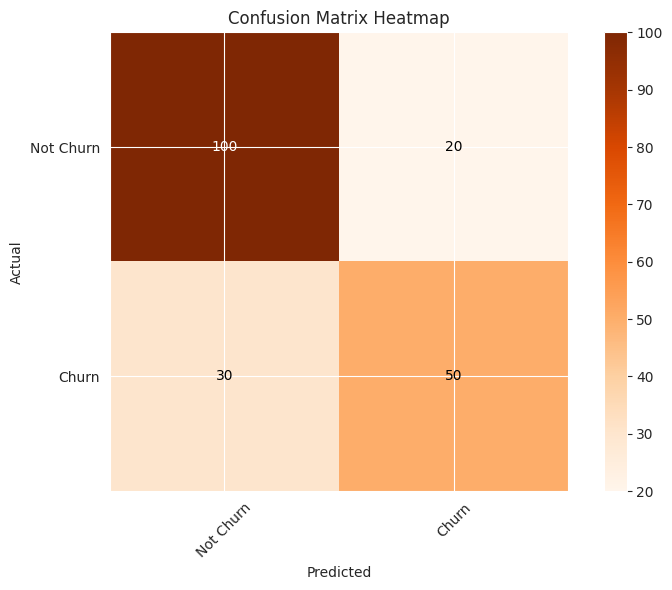

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual confusion matrix values
true_negative = 100
false_positive = 20
false_negative = 30
true_positive = 50

# Create the confusion matrix
confusion_matrix = np.array([[true_negative, false_positive],
                              [false_negative, true_positive]])

# Define class labels
class_labels = ['Not Churn', 'Churn']

# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix Heatmap')
plt.colorbar()

# Set ticks for class labels
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add values inside the heatmap
thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

# Show the plot
plt.show()


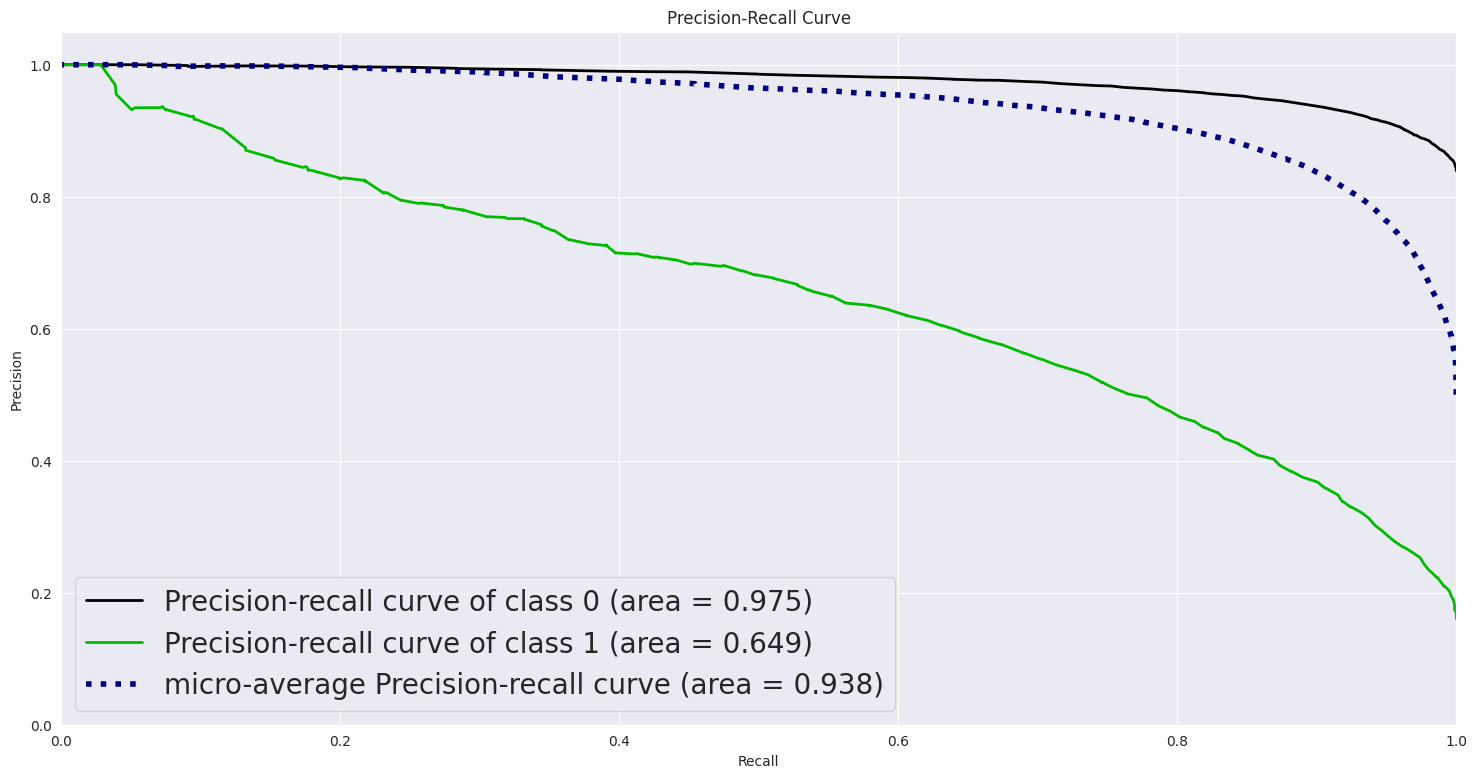

In [55]:
unsampled_data_prediction_RF = rf_pipe.predict_proba(original_df_with_pcs[X_features])
skplt.metrics.plot_precision_recall(original_df_with_pcs['Attrition_Flag'], unsampled_data_prediction_RF)
plt.legend(prop={'size': 20})

# Conclusion

**Comprehensive Data Understanding:** EDA provided an in-depth understanding of the bank's customer data, including demographics, account information, and transaction behavior.

**Identifying Key Trends:** EDA revealed significant trends and patterns, like age distribution, gender ratio, and income levels, crucial for understanding customer churn.

**Outlier Detection:** It helped in identifying outliers, ensuring the accuracy of subsequent analyses and models.

**Data Quality Assessment:** EDA assessed data quality, highlighting issues like missing values and potential data errors.

**Correlation Analysis:** It facilitated the analysis of correlations between different features, shedding light on potential predictors of churn.

**Feature Importance Identification:** EDA assisted in identifying important features that could significantly impact churn prediction.

**Data Visualization Benefits:** Utilized various visualization techniques to present data insights more intuitively and compellingly.

**Guiding Model Development:** Insights from EDA directly informed the development and selection of predictive models.

**Informed Decision-Making:** EDA's findings enabled more informed, data-driven decision-making for customer retention strategies.

**Enhancing Predictive Accuracy:** By understanding data characteristics, EDA contributed to enhancing the predictive accuracy of the churn models.

**Validation of Hypotheses:** EDA helped in validating or disproving initial hypotheses about customer behavior and churn.

**Basis for Feature Engineering:** It provided a solid basis for feature engineering, improving model performance.

**Benchmarking Model Performance:** Allowed for benchmarking the performance of different predictive models like Random Forest, AdaBoost, and SVM.

**Impact on Business Strategy:** Highlighted the potential impact of churn on the bank's business strategy and customer retention efforts.

**Foundation for Future Research:** Set a foundation for further research and exploration into advanced data analysis and modeling techniques in the banking sector.

# Reference

1. ChatGPT
2. [Kaggledataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)
3. [IBM - Understanding EDA](https://www.ibm.com/topics/exploratory-data-analysis)
4. [Youtube](https://www.youtube.com/watch?v=-o3AxdVcUtQ&ab_channel=edureka%21)